<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-YR11970/blob/main/Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name: Yi Ren**

**Student Number: 400534550**

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file and save it in a public GitHub repository.

* Load the dataset as a pandas data frame and display the first few rows.

    * How many features (columns) and records (rows) are in the dataset?

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Nata Supermarket.csv')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()
#There are 29 columns and 2240 entries(rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [3]:
df.isnull()
df.isnull().sum()
#Only column Income has 24 missing values

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [4]:
# Since there are only 24 entries missing among 2240, and they all come from Income col. It'd be the best to fill in the missing value on Income with the median so that the values in the remaining col could still make an impact.
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

# Verify
df['Income'].isnull().sum()


np.int64(0)

## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [5]:
from datetime import datetime

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
today = datetime.today()
df["Customer_Days"] = (today - df["Dt_Customer"]).dt.days
df.head()


/tmp/ipython-input-598405174.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,4939
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,4093
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,4440
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,4033
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,4289


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

<Axes: title={'center': 'Distribution of Customer Education Level'}, ylabel='count'>

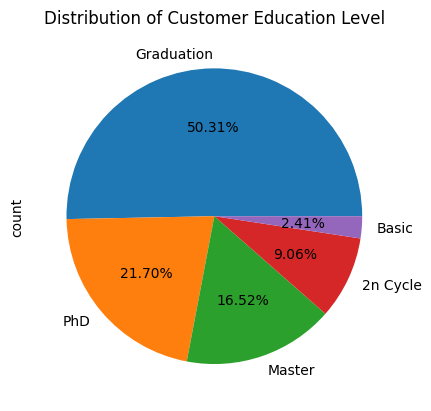

In [6]:
#Education
df['Education'].value_counts().plot(kind='pie',autopct='%1.2f%%', title = 'Distribution of Customer Education Level')

#Over 50% of customers are college graduates. On top of that, there're 21.7% PhDs and 16.52% Masters. This indicates the customer at Nata Supermarket are well-educated and are more likely to be mid-upper income families.


<Axes: title={'center': 'Distribution of Customer Marital Status'}, ylabel='count'>

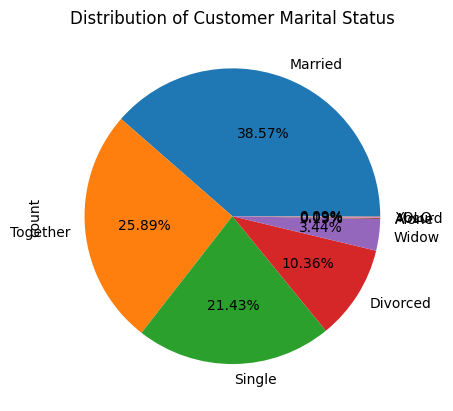

In [7]:
#Marital
df['Marital_Status'].value_counts().plot(kind='pie',autopct='%1.2f%%', title = 'Distribution of Customer Marital Status')

# 38.57% Married and 25.89% make up the majority of the customer base, indicating the supermarket primarily serves families or couples, rather than single individuals.

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

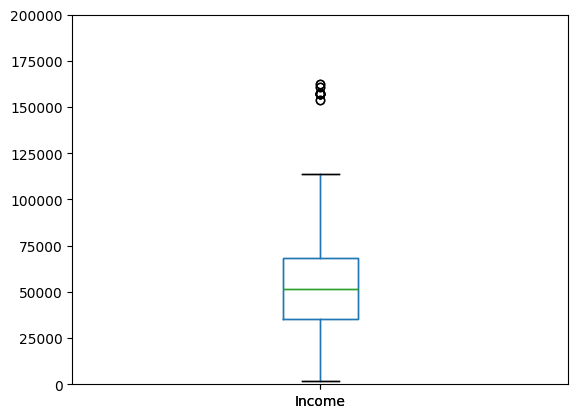

In [11]:
import matplotlib.pyplot as plt

#Income
df.boxplot(column = "Income", grid = False)
df.boxplot(column = "Income", grid = False).set_ylim(0,200000)

plt.show()
#Majority of Nata Supermarket customers earn between $35K–$70K, with a few very high-income outliers.

<Axes: >

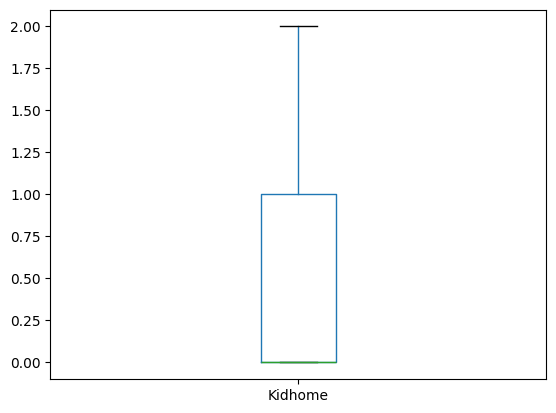

In [12]:
#Kidhome
df.boxplot(column = "Kidhome", grid = False)
# Kidhome distributions heavily skewed toward zero, indicating that most customers don't have children at home.

<Axes: >

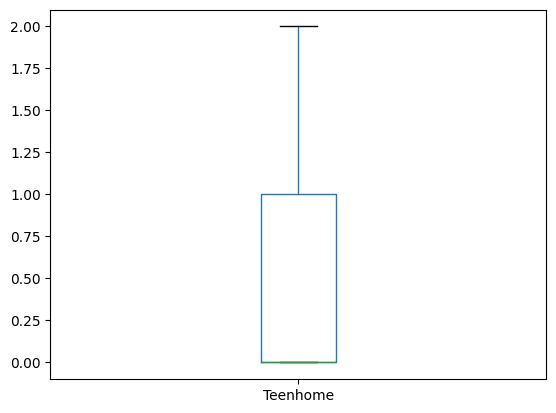

In [10]:
#Teenhome
df.boxplot(column = "Teenhome", grid = False)
# Similar to Kidhome, most customers don't have teenagers at home as well.

Therefore, the typical household profile for Nata Supermarket is that of a middle-income young or mid-age couple or small households with no kids.

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [9]:
spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df[spending_cols].sum().sort_values(ascending=False)
#The category that customers spend the most is Wines with total of $680,816, followed by Meat products in #373,968.

,0
MntWines,680816
MntMeatProducts,373968
MntGoldProds,98609
MntFishProducts,84057
MntSweetProducts,60621
MntFruits,58917


## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

For the last question Q7, I initially was thinking to sum of the values for each col one by one and compare, but then I consulted AI for a more concise code which combined the sum and sort all together and it provides a more concise way of doing it.